In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
p_fin = pd.read_csv("../예비2 - 변수선택용 proact 데이터/feature_combined_without_nan_결과변수 포함.csv")
p_fin["diag-onset"]=p_fin["diag_delta"]-p_fin["onset_delta"]
p_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 40 columns):
Unnamed: 0           974 non-null int64
SubjectID            974 non-null int64
Age                  974 non-null float64
Gender               974 non-null object
Race                 974 non-null object
diag_delta           974 non-null float64
onset_delta          974 non-null float64
onset_site           974 non-null object
if_use_Riluzole      974 non-null object
treatment_group      974 non-null object
mean_alsfrs_total    974 non-null float64
min_alsfrs_total     974 non-null float64
max_alsfrs_total     974 non-null float64
fvc_slope            974 non-null float64
fvc_mean             974 non-null float64
fvc_min              974 non-null float64
fvc_max              974 non-null float64
mean_bp_d            974 non-null float64
max_bp_d             974 non-null float64
min_bp_d             974 non-null float64
mean_bp_s            974 non-null float64
max_bp_s             9

In [10]:
p_fin = p_fin.drop(columns = "Unnamed: 0")
p_fin = p_fin.drop(columns = "SubjectID")

p_fin.head()

,Age,Gender,Race,diag_delta,onset_delta,onset_site,if_use_Riluzole,treatment_group,mean_alsfrs_total,min_alsfrs_total,...,bp_s_slope,pulse_slope,resp_rate_slope,mean_weight,max_weight,min_weight,slope_weight,mean_BMI,ALSFRS_slope,diag-onset
0,44.0,M,White,-70.0,-418.0,Limb,No,Placebo,36.000000,35.0,...,0.055556,0.133333,0.007266,88.925000,89.5,88.2,0.007778,0.002638,-0.987554,348.0
1,54.0,M,White,-70.0,-418.0,Limb,Yes,Placebo,26.000000,23.0,...,0.428571,0.114286,0.057143,79.433333,83.3,77.0,-0.014286,0.002462,-1.613005,348.0
2,67.0,M,White,-70.0,-418.0,Limb,Yes,Active,32.666667,32.0,...,0.140845,-0.028169,0.014085,74.000000,75.0,73.0,0.028169,0.002526,-1.672394,348.0
3,56.0,F,White,-70.0,-418.0,Limb,Yes,Active,26.000000,24.0,...,-0.116279,-0.046512,0.162791,55.250000,56.0,55.0,-0.004179,0.002096,0.303156,348.0
4,33.0,M,White,-70.0,-418.0,Limb,No,Active,26.666667,26.0,...,0.039216,0.274510,0.156863,117.366667,119.2,116.1,-0.013725,0.002638,-1.382576,348.0


In [11]:
X = p_fin.copy()
y = X.pop("ALSFRS_slope")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
  

# All discrete features should now have integer dtypes (double-check this before using MI!)

discrete_features = X.dtypes == "int64"

In [12]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3] # show a few features with their MI scores

onset_delta          0.093256
bp_s_slope           0.056397
max_bp_s             0.051091
max_resp_rate        0.045157
diag_delta           0.031356
mean_alsfrs_total    0.026495
mean_BMI             0.023337
diag-onset           0.022265
min_bp_s             0.015107
max_alsfrs_total     0.008265
resp_rate_slope      0.000034
pulse_slope          0.000000
Gender               0.000000
Name: MI Scores, dtype: float64

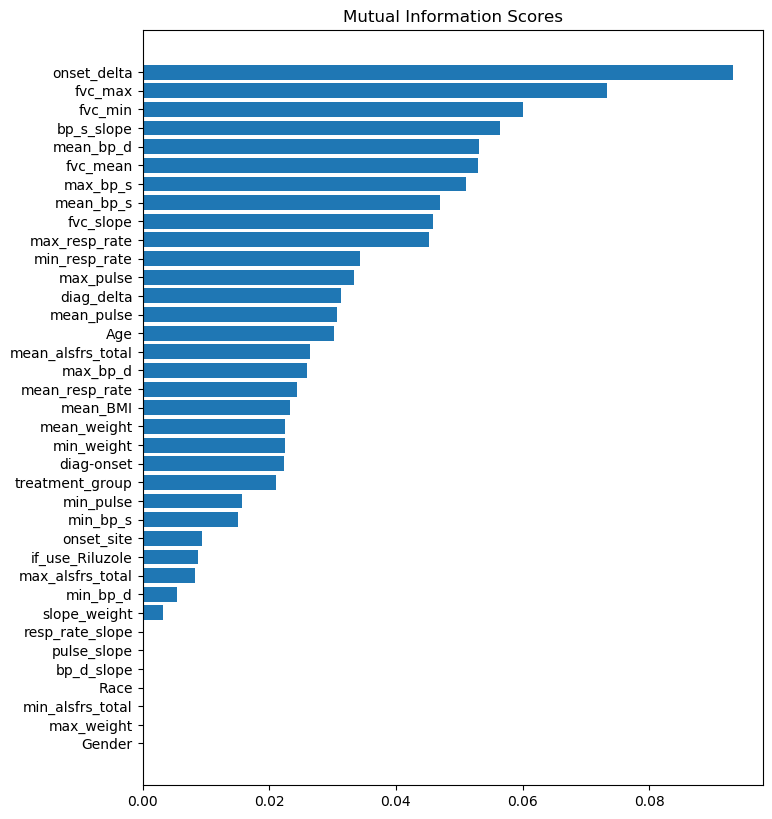

In [13]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 10))
plot_mi_scores(mi_scores)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\pc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


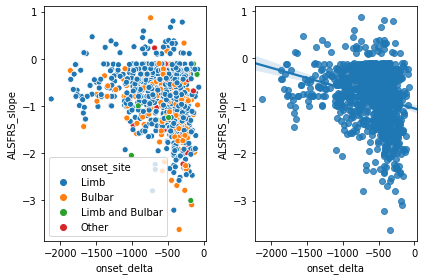

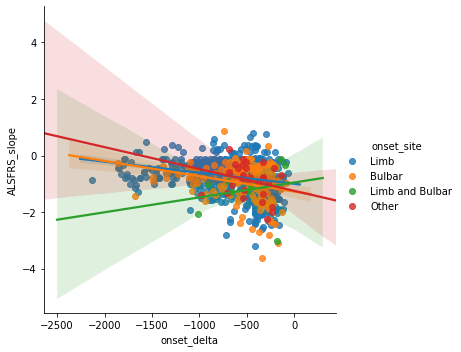

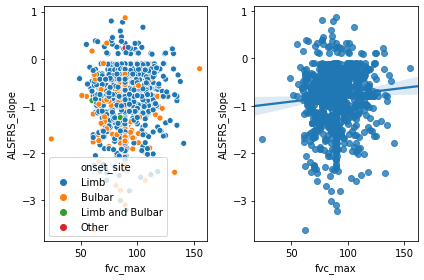

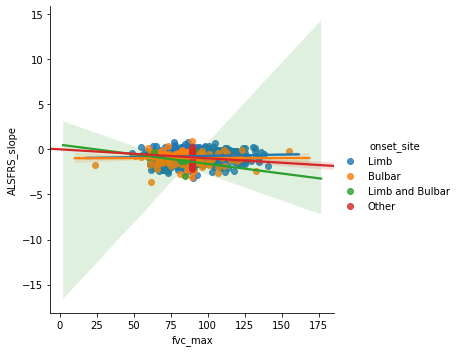

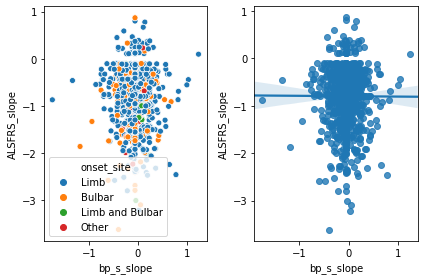

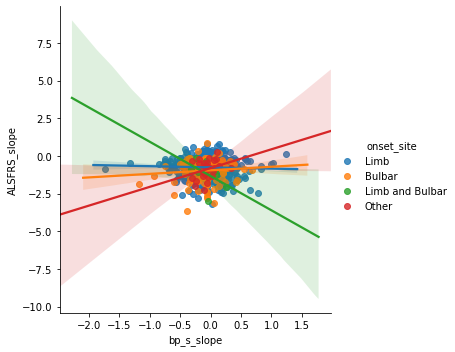

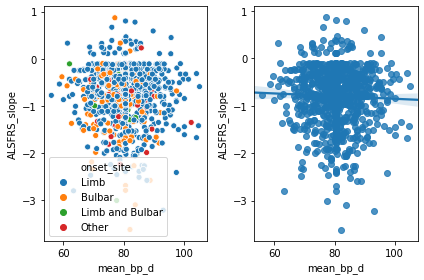

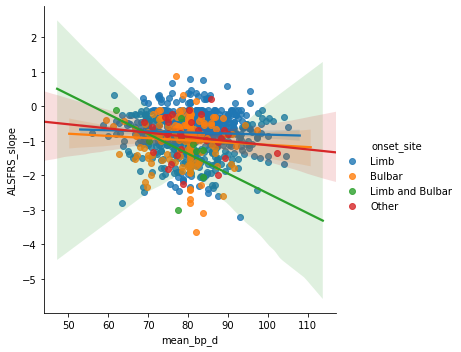

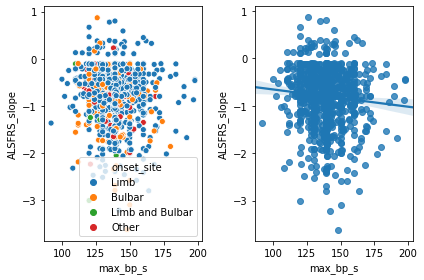

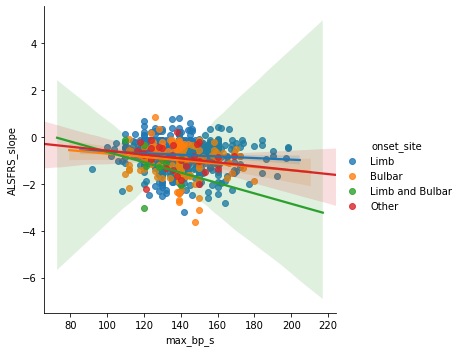

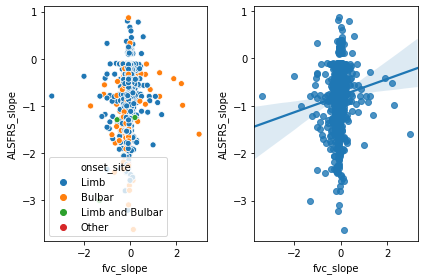

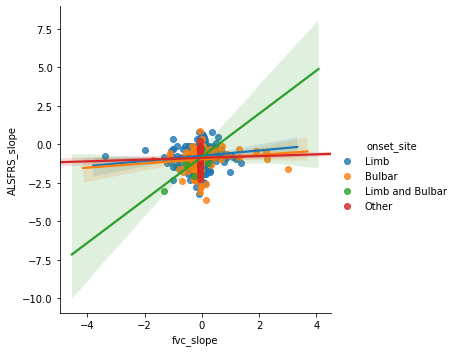

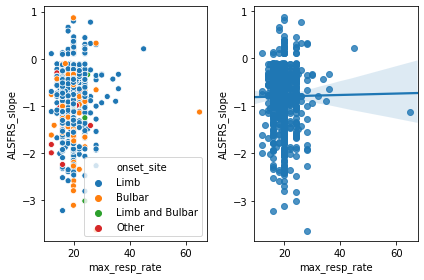

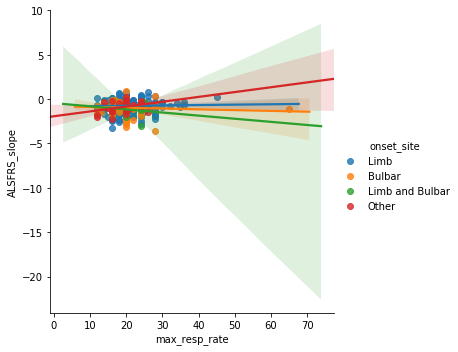

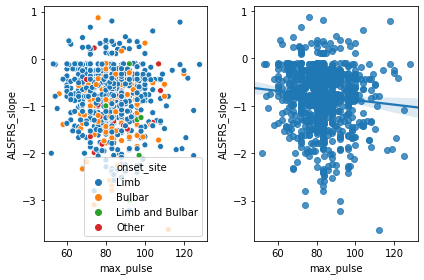

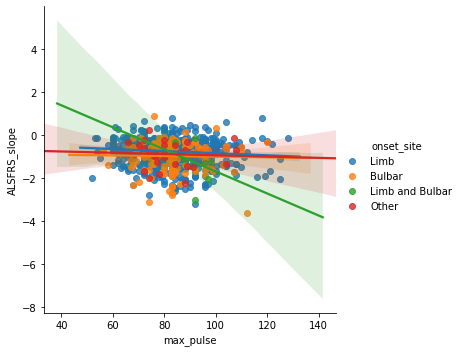

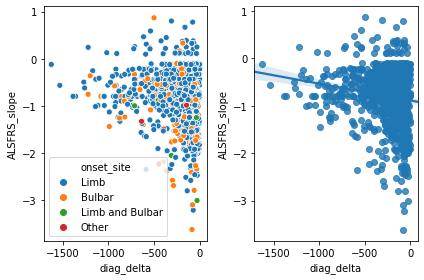

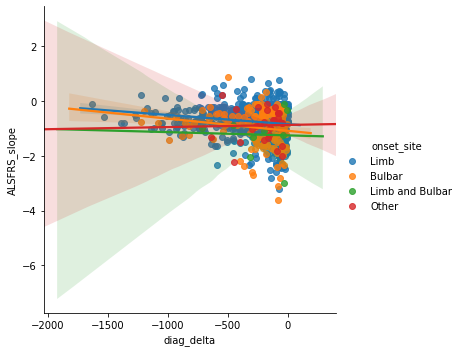

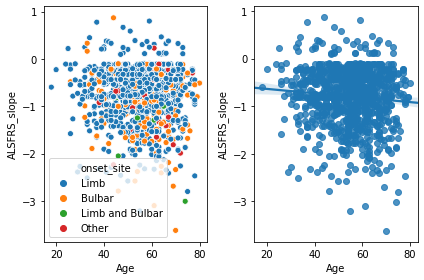

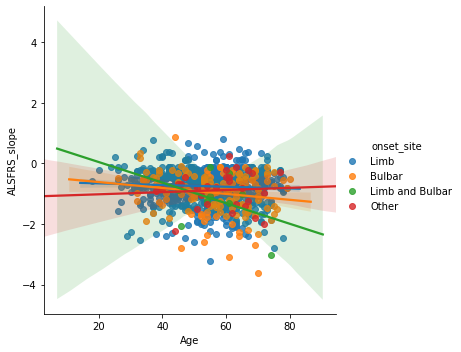

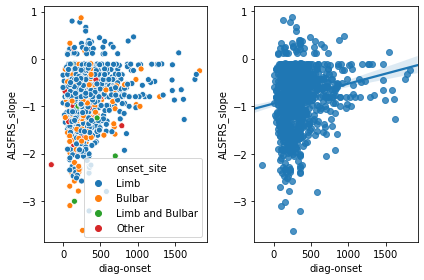

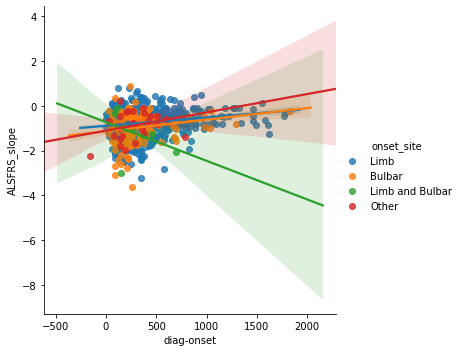

In [38]:
feature_list = ["onset_delta", "fvc_max", "bp_s_slope", "mean_bp_d", "max_bp_s", "fvc_slope", "max_resp_rate", "max_pulse", "diag_delta", "Age", "diag-onset"]

for i in feature_list:
    fig, ax = plt.subplots(ncols=2)
    sns.scatterplot(x=i, y="ALSFRS_slope", hue="onset_site", data=p_fin, ax=ax[0])
    sns.regplot(x=i, y="ALSFRS_slope", data=p_fin, ax=ax[1])
    fig.tight_layout()
    sns.lmplot(x=i, y="ALSFRS_slope", hue = "onset_site", data=p_fin)